In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

### Trainer Portion

!python main.py Z BATCH_SIZE NUM_EPOCHS MALWARE_FILE BENIGN_FILE

In [21]:
!python ./MalwareGAN/main.py 10 32 50 ./MalwareGAN/data/trial_mal.npy ./MalwareGAN/data/trial_ben.npy

2023-11-22 16:44:36,794 -- INFO -- ******************* New Run Beginning *****************
2023-11-22 16:44:36,794 -- DEBUG -- CUDA: ENABLED
2023-11-22 16:44:36,794 -- INFO -- ./MalwareGAN/main.py 10 32 50 ./MalwareGAN/data/trial_mal.npy ./MalwareGAN/data/trial_ben.npy
2023-11-22 16:44:36,806 -- DEBUG -- Constructing new MalGAN
2023-11-22 16:44:36,806 -- DEBUG -- Malware Dimension (M): 128
2023-11-22 16:44:36,807 -- DEBUG -- Latent Dimension (Z): 10
2023-11-22 16:44:36,807 -- DEBUG -- Test Split Ratio: 0.200
2023-11-22 16:44:36,807 -- DEBUG -- Generator Hidden Layer Sizes: [256, 256]
2023-11-22 16:44:36,807 -- DEBUG -- Discriminator Hidden Layer Sizes: [256, 256]
2023-11-22 16:44:36,808 -- DEBUG -- Blackbox Detector Type: RandomForest
2023-11-22 16:44:36,808 -- DEBUG -- Activation Type: LeakyReLU
[822, 273, 273]
[353, 0, 88]
2023-11-22 16:44:36,813 -- DEBUG -- Starting training of blackbox detector of type "RandomForest"
2023-11-22 16:44:36,938 -- DEBUG -- COMPLETED training of blackbo

### Benchmarks of MALGAN

In [25]:
import pandas as pd

# load the 4 files in the 'results' folder
df1 = pd.read_csv('results/results_50.csv')
df2 = pd.read_csv('results/results_100.csv')
df3 = pd.read_csv('results/results_200.csv')
df = pd.concat([df1, df2, df3])
df 

time_completed    M   Z  batch_size  test_set_size  \
0  2023-11-22 16:44:55.373035  128  10          32            361   
0  2023-11-22 16:19:20.587624  128  10          32            361   
0  2023-11-22 16:18:19.354772  128  10          32            361   

             detector_type activation gen_hidden_dim discim_hidden_dim  \
0   RandomForest 50 Epochs  LeakyReLU     [256, 256]        [256, 256]   
0  RandomForest 100 Epochs  LeakyReLU     [256, 256]        [256, 256]   
0  RandomForest 200 Epochs  LeakyReLU     [256, 256]        [256, 256]   

   avg_validation_loss  avg_test_loss  avg_num_bits_changed       auc  \
0            -1.051629      -1.064729                22.663  0.913628   
0            -1.368382      -1.630427                27.242  0.911797   
0            -2.203478      -2.197942                24.615  0.873668   

   orig_mal_detect_rate  mod_mal_detect_rate  ben_mal_detect_rate  
0              0.981685             0.600733             0.090909  
0              0.989011             0.545788             0.113636  
0              0.974359             0.494505             0.125000

<Axes: xlabel='detector_type'>

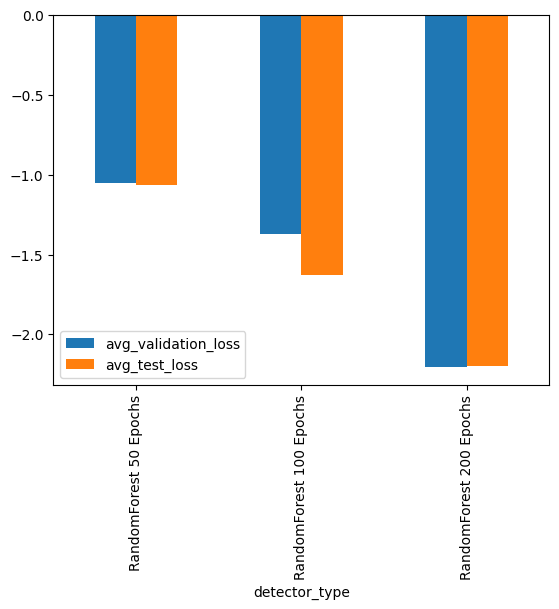

In [28]:
import matplotlib.pyplot as plt

df.plot(x='detector_type', y=['avg_validation_loss', 'avg_test_loss'], kind='bar')


<Axes: xlabel='detector_type'>

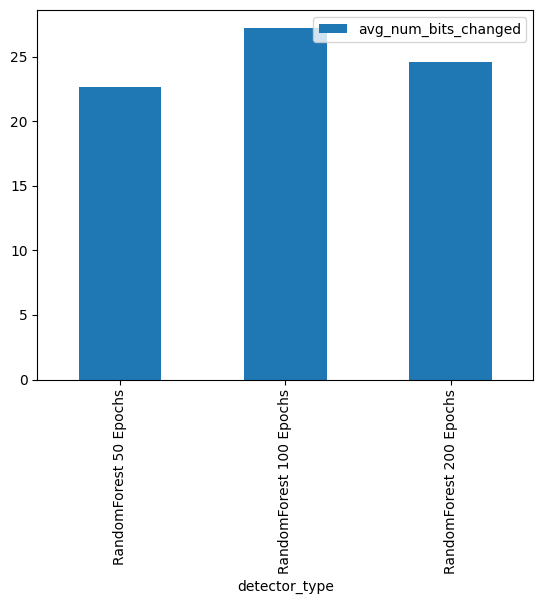

In [29]:
df.plot(x='detector_type', y='avg_num_bits_changed', kind='bar')

<Axes: xlabel='detector_type'>

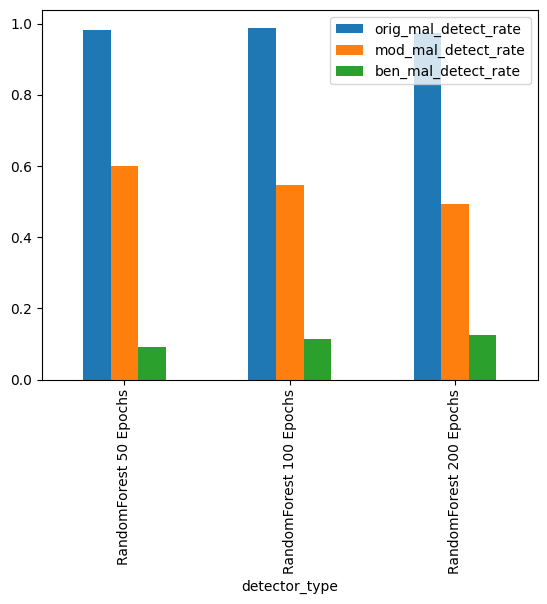

In [30]:
# Malware Detection rate
df.plot(x='detector_type', y=['orig_mal_detect_rate', 'mod_mal_detect_rate', 'ben_mal_detect_rate'], kind='bar')